In [68]:
import pandas.io.data as web
import pandas as pd
import datetime
import numpy as np
import matplotlib as mpl
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 6.0) # set size of figures"
plt.rcParams.update({'font.size': 18})

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [136]:
start = datetime.datetime(2010, 1, 1)
#end = datetime.datetime(2013, 1, 27)
end = datetime.datetime.utcnow()
f=web.DataReader(["AAPL","GOOGL","F","TSLA","BA"], 'yahoo', start, end) #yahoo
#f.ix['2010-01-04']

<h1> Plot the stocks </h1>

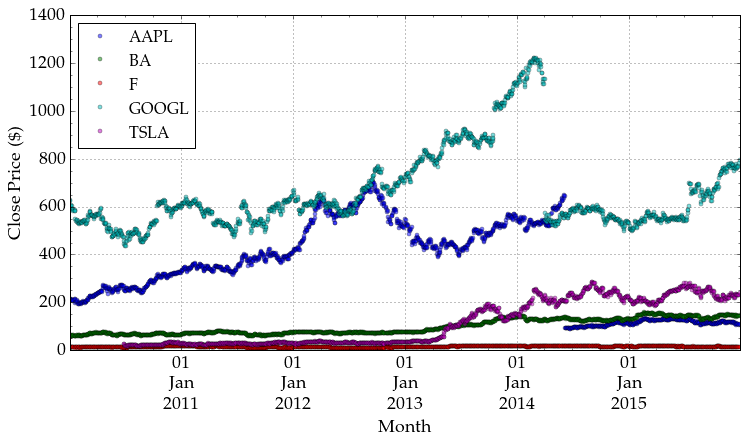

In [137]:
for key,val in f.Close.iteritems():
#for key,val in f.Close.loc[pd.DatetimeIndex(f.Close.index).year>2014].iteritems():
    plot(val.index,val, 'o', markersize=4, alpha=0.5, label=key)
    #plt.fill_between(val.index, 0, val, where=val >= 0, alpha = 0.3, interpolate=True)
ax = gca()
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d\n%b\n%Y'))
minorticks_on()
legend(loc='upper left',numpoints=1,fontsize=16)
plt.xlabel('Month')
plt.ylabel('Close Price (\$)')
plt.grid()
#plt.yscale('log')

#plt.fill_between(val.index, 0, val, where=val >= 0, facecolor='red', alpha = 0.1, interpolate=True)

<h1> plot high vs low </h1>

In [123]:
#Difference of High to Low, relative to the low of the day.
(f.High-f.Low)/f.Low

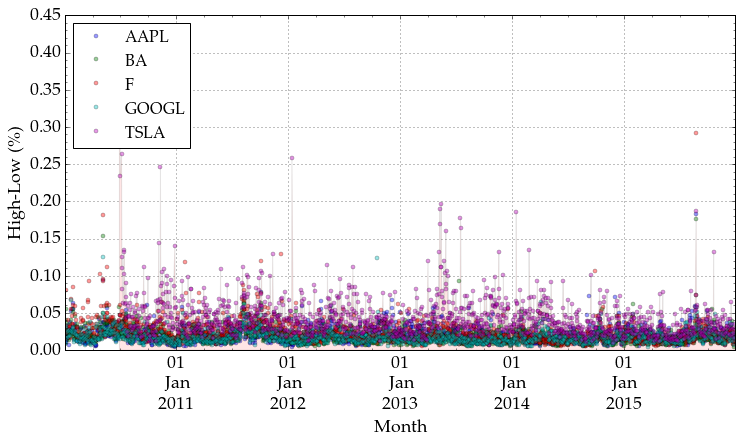

In [138]:
for key,val in ((f.High-f.Low)/f.Low).iteritems():
#for key,val in f.Close.loc[pd.DatetimeIndex(f.Close.index).year>2014].iteritems():
    plot(val.index,val, 'o', markersize=4, alpha=0.4, label=key)
    #plt.fill_between(val.index, 0, val, where=val >= 0, alpha = 0.3, interpolate=True)
ax = gca()
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d\n%b\n%Y'))
minorticks_on()
legend(loc='upper left',numpoints=1,fontsize=16)
plt.xlabel('Month')
plt.ylabel('High-Low (\%)')
plt.grid()
#plt.yscale('log')

plt.fill_between(val.index, 0, val, where=val >= 0, facecolor='red', alpha = 0.1, interpolate=True)

<h1> Do the same for open close </h1>

('AAPL', -0.042424335783480482)
('BA', 0.022510797723046296)
('F', -0.078397545750082287)
('GOOGL', -0.033900784014143169)
('TSLA', -0.011092776513967981)


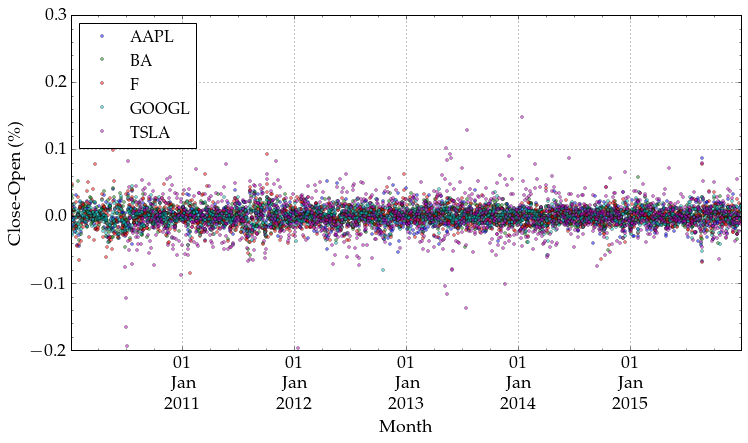

In [143]:
for key,val in ((f.Close-f.Open)/f.Open).iteritems():
#for key,val in f.Close.loc[pd.DatetimeIndex(f.Close.index).year>2014].iteritems():
    plot(val.index,val, 'o', markersize=3, alpha=0.5, label=key)
    print(key,mean(val)*100)
    #plt.fill_between(val.index, 0, val, where=val >= 0, alpha = 0.3, interpolate=True)
ax = gca()
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d\n%b\n%Y'))
minorticks_on()
legend(loc='upper left',numpoints=1,fontsize=16)
plt.xlabel('Month')
plt.ylabel('Close-Open (\%)')
plt.grid()
#plt.yscale('log')

#plt.fill_between(val.index, 0, val, where=val >= 0, facecolor='red', alpha = 0.1, interpolate=True)

<h1> Sort a given stock by month and calculate the montly average </h1>

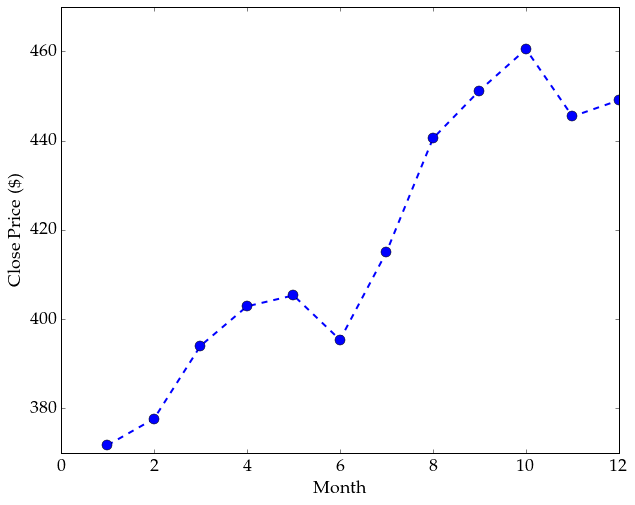

In [32]:
month=np.arange(1,13)
aapl_month_ave=[]
for mon in month:
    aapl_month_ave.append(mean(f.Close.AAPL.loc[(pd.DatetimeIndex(f.Close.index).month==mon)\
                                               & (pd.DatetimeIndex(f.Close.index).year<2014)]))
aapl_month_ave=np.array(aapl_month_ave)

plt.plot(month, aapl_month_ave,'--ob',markersize=10)
plt.xlabel('Month')
plt.ylabel('Close Price (\$)')

In [12]:
f.loc

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 1508 (major_axis) x 3 (minor_axis)
Items axis: Open to Adj Close
Major_axis axis: 2010-01-04 00:00:00 to 2015-12-29 00:00:00
Minor_axis axis: AAPL to GOOG